In [1]:
import sys
sys.path.append('../../src/data_handling')

In [2]:
from reader import BatteryDataReader

# 1. Xác định ID pin và đường dẫn thư mục
battery_to_load = "B0005"

data_directory = "../../dataset/" 

# 2. Khởi tạo đối tượng BatteryDataReader
print(f"\nInitializing reader for battery: {battery_to_load}")
b0005_reader = BatteryDataReader(battery_id=battery_to_load, data_dir=data_directory)

# 3. Tải dữ liệu
print("\nAttempting to load data...")
load_status = b0005_reader.load_data()

# 4. Kiểm tra và sử dụng dữ liệu nếu tải thành công
if load_status:
    print("\nData for B0005 loaded successfully.")

    # Lấy các DataFrame
    df_capacity_b0005, df_charge_b0005, df_discharge_b0005 = b0005_reader.get_raw_data()

    


Initializing reader for battery: B0005

Attempting to load data...
--- Loading data for battery: B0005 ---
  Successfully loaded: capacity_B0005.csv
  Successfully loaded: charge_B0005.csv
  Successfully loaded: discharge_B0005.csv
--- Data loading process completed for B0005 ---

Data for B0005 loaded successfully.



--- Initializing Feature Engineer for B0005 ---
  Ensuring numeric types for B0005...
--- Starting Feature Engineering process for B0005 ---
  Calculating SOH/RUL for B0005...
  Engineering discharge features for B0005...


  Engineering charge features for B0005...


  Merging features for B0005...


d:\ĐỒ ÁN TỐT NGHIỆP DEMO1\ĐỒ ÁN TỐT NGHIỆP demo1\source\battery_soh_rul_estimation\test\data_handling\../../src/data_handling\feature_engineer.py:229: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='bfill').fillna(method='ffill')


  Handling NaNs for B0005...
--- Feature Engineering process finished for B0005 ---

--- Processed Data for B0005 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cycle               168 non-null    int64  
 1   capacity            168 non-null    float64
 2   SOH                 168 non-null    float64
 3   RUL                 168 non-null    int64  
 4   Discharge_V_median  168 non-null    float64
 5   Discharge_V_skew    168 non-null    float64
 6   Discharge_T_delta   168 non-null    float64
 7   Discharge_T_std     168 non-null    float64
 8   Charge_T_std        168 non-null    float64
 9   Time_CC_phase       168 non-null    float64
 10  Time_CV_phase       168 non-null    float64
 11  CV_I_end            168 non-null    float64
 12  battery_id          168 non-null    object 
dtypes: float64(10), int64(2), object(1)
m

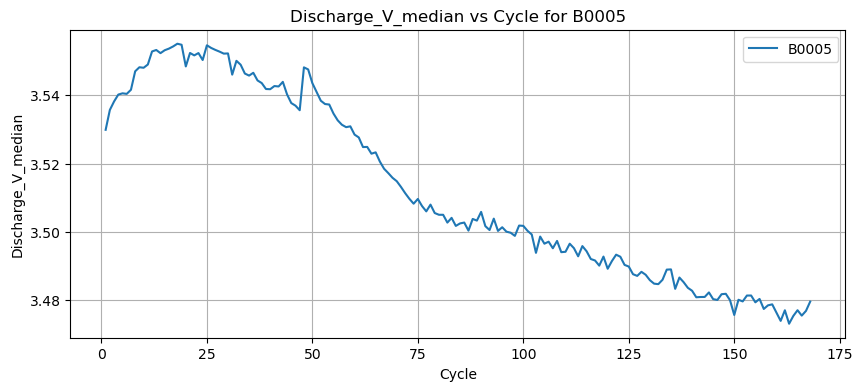


Plotting SOH and RUL vs Cycle...


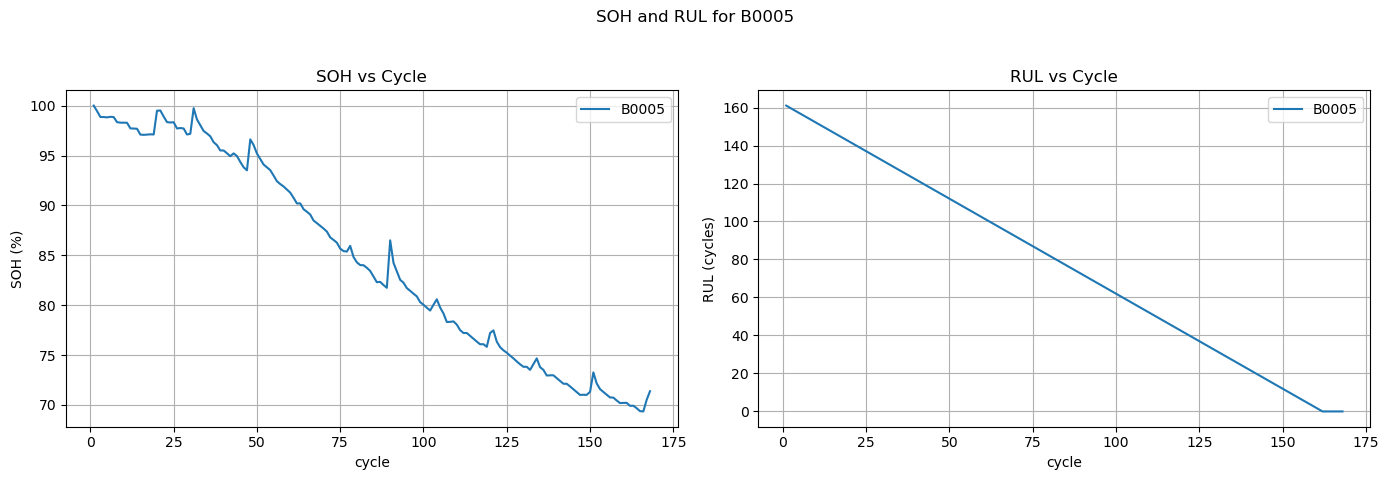

In [3]:
from feature_engineer import BatteryFeatureEngineer

# Kiểm tra xem các DataFrame đã được tải chưa
if 'df_capacity_b0005' in locals() and df_capacity_b0005 is not None and \
   'df_charge_b0005' in locals() and df_charge_b0005 is not None and \
   'df_discharge_b0005' in locals() and df_discharge_b0005 is not None:

    print("\n--- Initializing Feature Engineer for B0005 ---")
    # Sử dụng config mặc định
    fe_b0005 = BatteryFeatureEngineer(
        battery_id="B0005",
        capacity_df=df_capacity_b0005,
        charge_df=df_charge_b0005,
        discharge_df=df_discharge_b0005
        # config = { 'eol_threshold_percentage': 0.75 } # Ví dụ ghi đè config
    )

    # Thực hiện quá trình Feature Engineering
    fe_b0005.process()

    # Lấy dữ liệu đã xử lý
    processed_b0005_df = fe_b0005.get_processed_data()

    if processed_b0005_df is not None:
        print("\n--- Processed Data for B0005 ---")
        print(processed_b0005_df.info())
        print(processed_b0005_df.head())
        print(f"\nInitial Capacity calculated: {fe_b0005.initial_capacity:.4f} Ah")
        print(f"Cycle at EoL calculated: {fe_b0005.cycle_at_eol}")

        # Ví dụ vẽ đồ thị một feature
        print("\nPlotting Discharge_V_median vs Cycle...")
        fe_b0005.plot_feature_vs_cycle('Discharge_V_median')

        print("\nPlotting SOH and RUL vs Cycle...")
        fe_b0005.plot_soh_rul()

    else:
        print("\nFeature engineering process failed for B0005.")

else:
    print("\nError: Raw data DataFrames for B0005 are not available or None. Please run the BatteryDataReader example first.")